<a href="https://colab.research.google.com/github/Tuleen03/Computer-Vision-Project/blob/main/berryfinds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SETUP

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.221 🚀 Python-3.13.7 torch-2.9.0 CPU (Apple M4 Max)
Setup complete ✅ (14 CPUs, 36.0 GB RAM, 149.6/926.4 GB disk)


In [ ]:
from ultralytics import YOLO
model = YOLO("YOLO11m-cls.pt")   # pretrained YOLOv11-Large (detection)


In [ ]:
import os, platform
print(platform.platform())
print("Path exists:", os.path.exists("/Users/tuleen/Downloads/BERRY_DATA2"))


macOS-26.0.1-arm64-arm-64bit-Mach-O
Path exists: True


## RESULTS

In [ ]:
results = model.train(
    data="/Users/tuleen/Downloads/BERRY_DATA2",  # your dataset path
    epochs=80,            # early stopping will likely cut it short
    batch=8,              # small batches for stability
    imgsz=256,            # larger input improves feature learning
    lr0=0.001,            # gentle learning rate
    dropout=0.2,          # helps with overfitting
    auto_augment="randaugment",
    erasing=0.4,
    fliplr=0.5,
    patience=15,
    device="mps",         #mac gpu
    project="runs-cls",
    name="berry_final",
    seed=42,
    deterministic=True
)

New https://pypi.org/project/ultralytics/8.3.224 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.221 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4 Max)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/tuleen/Downloads/BERRY_DATA2, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.2, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=YOLO11m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=berry_final, nbs=64, nms=False, opset=None

In [ ]:
VAL_KW = dict(
    data=DATA_DIR, split="test", device=DEVICE,
    batch=32, workers=0, deterministic=True, seed=0,
    save_json=True, plots=True, verbose=True
)

print("== 224 ==")
res224 = model.val(imgsz=224, **VAL_KW)

print("== 256 ==")
res256 = model.val(imgsz=256, **VAL_KW)


== 224 ==
Ultralytics 8.3.221 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4 Max)
train: /Users/tuleen/Downloads/BERRY_DATA2/train... found 332 images in 19 classes ✅ 
val: /Users/tuleen/Downloads/BERRY_DATA2/val... found 71 images in 19 classes ✅ 
test: /Users/tuleen/Downloads/BERRY_DATA2/test... found 50 images in 19 classes ✅ 
test: Fast image access ✅ (ping: 0.1±0.1 ms, read: 118.1±67.2 MB/s, size: 28.4 KB)
test: Scanning /Users/tuleen/Downloads/BERRY_DATA2/test... 50 images, 0 corrupt: 100% ━━━━━━━━━━━━ 50/50 118.8Kit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 2/2 10.8it/s 0.2s
                   all       0.92       0.98
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /Users/tuleen/runs/classify/val23
== 256 ==
Ultralytics 8.3.221 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4 Max)
train: /Users/tuleen/Downloads/BERRY_DATA2/train... found 332 images in 19 classes ✅ 
val: /Users/tuleen/Downloads/BERRY_DATA2/val..

In [ ]:
for IMG in (224, 256):
    print(f"\n=== EVAL @ {IMG}px ===")
    # Ultralytics official numbers
    model.val(data=DATA_DIR, split="test", imgsz=IMG, device=DEVICE,
              batch=32, workers=0, deterministic=True, seed=0,
              save_json=True, plots=True, verbose=True)

    # Your manual metrics with matching size
    preds = model.predict(source=img_paths, imgsz=IMG, device=DEVICE, verbose=False)
    # (then run the same metrics block to print/save per-class CSVs and
    # cm_counts.png / cm_norm_true.png / cm_norm_pred.png into eval_test_<IMG>/)



=== EVAL @ 224px ===
Ultralytics 8.3.221 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4 Max)
train: /Users/tuleen/Downloads/BERRY_DATA2/train... found 332 images in 19 classes ✅ 
val: /Users/tuleen/Downloads/BERRY_DATA2/val... found 71 images in 19 classes ✅ 
test: /Users/tuleen/Downloads/BERRY_DATA2/test... found 50 images in 19 classes ✅ 
test: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1042.2±741.9 MB/s, size: 28.4 KB)
test: Scanning /Users/tuleen/Downloads/BERRY_DATA2/test... 50 images, 0 corrupt: 100% ━━━━━━━━━━━━ 50/50 219.1Kit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 2/2 11.0it/s 0.2s
                   all       0.92       0.98
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /Users/tuleen/runs/classify/val25

=== EVAL @ 256px ===
Ultralytics 8.3.221 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4 Max)
train: /Users/tuleen/Downloads/BERRY_DATA2/train... found 332 images in 19 classes ✅ 
val: /Users/tuleen/D

In [ ]:
# Compare 224 vs 256: per-class metrics + safety score
import os, json, numpy as np, pandas as pd
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from ultralytics import YOLO

DATA_DIR = "/Users/tuleen/Downloads/BERRY_DATA2"
WEIGHTS  = "/Users/tuleen/runs-cls/berry_final/weights/best.pt"
DEVICE   = "mps"  # or "cpu"/"cuda:0"

model = YOLO(WEIGHTS)
names = [model.names[i] for i in range(len(model.names))]
num_classes = len(names)

# build test set lists
import os, glob, re
def norm(s): return re.sub(r"\s+", " ", s.strip().lower())
root = os.path.join(DATA_DIR, "test")
img_paths, y_true = [], []
for cls_name in sorted(os.listdir(root)):
    p = os.path.join(root, cls_name)
    if not os.path.isdir(p): continue
    idx = [i for i,n in model.names.items() if norm(n)==norm(cls_name)]
    if not idx: continue
    for q in glob.glob(os.path.join(p, "*")):
        if q.lower().endswith((".jpg",".jpeg",".png",".bmp",".webp",".tif",".tiff")):
            img_paths.append(q); y_true.append(idx[0])
y_true = np.array(y_true, int)

def eval_imgsz(sz):
    preds = model.predict(source=img_paths, imgsz=sz, device=DEVICE, verbose=False)
    y_pred = np.array([int(r.probs.top1) for r in preds], int)
    p,r,f1,support = precision_recall_fscore_support(y_true, y_pred, average=None, zero_division=0, labels=range(num_classes))
    df = pd.DataFrame({"class": names, "support": support, "precision": p, "recall": r, "f1": f1})
    top5 = sum(int(y_true[i]) in list(getattr(preds[i].probs,"top5",[])) for i in range(len(preds))) / len(preds)
    top1 = (y_true==y_pred).mean()
    return {"per_class": df, "top1": top1, "top5": top5, "y_pred": y_pred}

res224 = eval_imgsz(224)
res256 = eval_imgsz(256)

# Save per-class CSVs
out_base = os.path.dirname(WEIGHTS)
res224["per_class"].to_csv(os.path.join(out_base,"per_class_224.csv"), index=False)
res256["per_class"].to_csv(os.path.join(out_base,"per_class_256.csv"), index=False)

# Side-by-side + deltas
merged = res224["per_class"].merge(res256["per_class"], on="class", suffixes=("_224","_256"))
for col in ["precision","recall","f1"]:
    merged[col+"_delta(224-256)"] = merged[col+"_224"] - merged[col+"_256"]
merged.sort_values("f1_delta(224-256)", ascending=False, inplace=True)
merged.to_csv(os.path.join(out_base,"per_class_compare_224_vs_256.csv"), index=False)
print(merged[["class","support_224","precision_224","recall_224","f1_224",
              "precision_256","recall_256","f1_256","f1_delta(224-256)"]].to_string(index=False, float_format=lambda x: f"{x:.3f}"))

print(f"\nTOP-1: 224={res224['top1']:.4f}, 256={res256['top1']:.4f}")
print(f"TOP-5: 224={res224['top5']:.4f}, 256={res256['top5']:.4f}")

# ---- Optional: safety-weighted score (edit the class lists to your taxonomy)
toxic = {
    "BLACK NIGHTSHADE","American Pokeweed","red elderberry","Virginia creeper",
    "false lily of the valley","snowberry","osoberry","red flowering currant","chokecherry"
}
edible = set(n for n in names if n not in toxic and n != "background")

def safety_score(y_pred):
    # penalties: toxic→edible (FN on toxic) = 5; edible→toxic (FP toxic) = 3; other mistakes = 1
    penalty = 0
    for t,p in zip(y_true, y_pred):
        true_name, pred_name = names[t], names[p]
        if true_name in toxic and pred_name in edible: penalty += 5
        elif true_name in edible and pred_name in toxic: penalty += 3
        elif t != p: penalty += 1
    return -penalty  # higher is safer

print("\nSafety score (higher is better):")
print("224:", safety_score(res224["y_pred"]))
print("256:", safety_score(res256["y_pred"]))


                   class  support_224  precision_224  recall_224  f1_224  precision_256  recall_256  f1_256  f1_delta(224-256)
         saskatoon berry            3          1.000       1.000   1.000          0.750       1.000   0.857              0.143
       American Pokeweed            2          1.000       1.000   1.000          1.000       1.000   1.000              0.000
        BLACK NIGHTSHADE            3          1.000       1.000   1.000          1.000       1.000   1.000              0.000
                   salal            3          1.000       0.667   0.800          1.000       0.667   0.800              0.000
                osoberry            3          1.000       1.000   1.000          1.000       1.000   1.000              0.000
            oregon grape            2          1.000       0.500   0.667          1.000       0.500   0.667              0.000
false lily of the valley            3          1.000       1.000   1.000          1.000       1.000   1.000    

In [ ]:
import os, glob
from pathlib import Path
from ultralytics import YOLO

candidates = []
candidates += glob.glob("runs-cls/*/weights/best.pt")
candidates += glob.glob("runs/classify/*/weights/best.pt")

if not candidates:
    raise FileNotFoundError("No best.pt found under runs-cls/ or runs/classify/. "
                            "Run training first or check your project/name paths.")

WEIGHTS = max(candidates, key=os.path.getmtime)  # newest
p = Path(WEIGHTS)
print("Using weights:", p.resolve())
print("Exists?", p.exists(), "Size:", p.stat().st_size, "bytes")

model = YOLO(str(p.resolve()))


Using weights: /Users/tuleen/runs-cls/berry_final/weights/best.pt
Exists? True Size: 20923542 bytes


# older and earlier model

In [ ]:
# --- CONFIG ---
DATA_DIR = "/Users/tuleen/Downloads/BERRY_DATA2"  # has train/ val/ test/
WEIGHTS  = "/Users/tuleen/runs-cls/berries-y11m-12each-aug12/weights/best.pt"


import os, glob, re, numpy as np
from ultralytics import YOLO
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def norm(s): return re.sub(r"\s+", " ", s.strip().lower())

# load model and class names
model = YOLO(WEIGHTS)
names = model.names

# choose split (prefer test/)
split = "test" if os.path.isdir(os.path.join(DATA_DIR, "test")) else "val"
root  = os.path.join(DATA_DIR, split)

# collect ground-truth and image paths
img_paths, y_true = [], []
for cls_name in os.listdir(root):
    cls_dir = os.path.join(root, cls_name)
    if not os.path.isdir(cls_dir):
        continue
    # map folder name -> class index by normalized match
    idxs = [i for i,n in names.items() if norm(n) == norm(cls_name)]
    if not idxs:
        continue
    idx = idxs[0]
    for p in glob.glob(os.path.join(cls_dir, "*")):
        if p.lower().endswith((".jpg",".jpeg",".png",".bmp",".webp",".tif",".tiff")):
            img_paths.append(p); y_true.append(idx)

# predict top-1 per image
preds = model.predict(source=img_paths, imgsz=256, device="mps", verbose=False)
y_pred = np.array([int(r.probs.top1) for r in preds])
y_true = np.array(y_true)

# metrics: overall macro + two classes of interest
report = classification_report(
    y_true, y_pred,
    target_names=[names[i] for i in range(len(names))],
    output_dict=True, zero_division=0
)
print("Overall (macro):  P={:.3f}  R={:.3f}  F1={:.3f}"
      .format(report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score']))

for cls in ['Bearberry', 'BLACK NIGHTSHADE']:
    if cls in report:
        r = report[cls]
        print(f"{cls}:  P={r['precision']:.3f}  R={r['recall']:.3f}  F1={r['f1-score']:.3f}  (n={int(r['support'])})")
    else:
        print(f"{cls}: not found — check exact class name in model.names: {list(names.values())}")

# save a confusion matrix CSV + image (simple)
cm = confusion_matrix(y_true, y_pred, labels=list(range(len(names))))
pd.DataFrame(cm, index=[names[i] for i in range(len(names))],
                columns=[names[i] for i in range(len(names))]).to_csv(
    "/Users/tuleen/runs-cls/confusion_matrix.csv"
)
print("Saved confusion matrix CSV to /Users/tuleen/runs-cls/confusion_matrix.csv")

# also trigger YOLO's nice plotted confusion matrix into the run dir
model.val(data=DATA_DIR, split=split, plots=True, save_json=True, device="mps")
print("YOLO plots (including confusion_matrix.png) saved under the model's run directory.")


Overall (macro):  P=0.839  R=0.862  F1=0.835
Bearberry:  P=0.667  R=1.000  F1=0.800  (n=2)
BLACK NIGHTSHADE:  P=1.000  R=1.000  F1=1.000  (n=3)
Saved confusion matrix CSV to /Users/tuleen/runs-cls/confusion_matrix.csv
Ultralytics 8.3.221 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4 Max)
train: /Users/tuleen/Downloads/BERRY_DATA2/train... found 332 images in 19 classes ✅ 
val: /Users/tuleen/Downloads/BERRY_DATA2/val... found 71 images in 19 classes ✅ 
test: /Users/tuleen/Downloads/BERRY_DATA2/test... found 50 images in 19 classes ✅ 
test: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1089.1±653.6 MB/s, size: 28.4 KB)
test: Scanning /Users/tuleen/Downloads/BERRY_DATA2/test... 50 images, 0 corrupt: 100% ━━━━━━━━━━━━ 50/50 404.1Kit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 4/4 6.5it/s 0.6s
                   all       0.86       0.96
Speed: 0.1ms preprocess, 7.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /Users/tuleen/runs/classify/val29


the code below modified using cl

In [ ]:
# --- CONFIG ---
DATA_DIR = "/Users/tuleen/Downloads/BERRY_DATA2"  # has train/ val/ test/
WEIGHTS  = "/Users/tuleen/runs-cls/berry_final/weights/best.pt"


import os, glob, re, numpy as np
from ultralytics import YOLO
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def norm(s): return re.sub(r"\s+", " ", s.strip().lower())

# load model and class names
model = YOLO(WEIGHTS)
names = model.names

# choose split (prefer test/)
split = "test" if os.path.isdir(os.path.join(DATA_DIR, "test")) else "val"
root  = os.path.join(DATA_DIR, split)

# collect ground-truth and image paths
img_paths, y_true = [], []
for cls_name in os.listdir(root):
    cls_dir = os.path.join(root, cls_name)
    if not os.path.isdir(cls_dir):
        continue
    # map folder name -> class index by normalized match
    idxs = [i for i,n in names.items() if norm(n) == norm(cls_name)]
    if not idxs:
        continue
    idx = idxs[0]
    for p in glob.glob(os.path.join(cls_dir, "*")):
        if p.lower().endswith((".jpg",".jpeg",".png",".bmp",".webp",".tif",".tiff")):
            img_paths.append(p); y_true.append(idx)

# predict top-1 per image
preds = model.predict(source=img_paths, imgsz=256, device="mps", verbose=False)
y_pred = np.array([int(r.probs.top1) for r in preds])
y_true = np.array(y_true)

# metrics: overall macro + two classes of interest
report = classification_report(
    y_true, y_pred,
    target_names=[names[i] for i in range(len(names))],
    output_dict=True, zero_division=0
)
print("Overall (macro):  P={:.3f}  R={:.3f}  F1={:.3f}"
      .format(report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score']))

for cls in ['Bearberry', 'BLACK NIGHTSHADE']:
    if cls in report:
        r = report[cls]
        print(f"{cls}:  P={r['precision']:.3f}  R={r['recall']:.3f}  F1={r['f1-score']:.3f}  (n={int(r['support'])})")
    else:
        print(f"{cls}: not found — check exact class name in model.names: {list(names.values())}")

# save a confusion matrix CSV + image (simple)
cm = confusion_matrix(y_true, y_pred, labels=list(range(len(names))))
pd.DataFrame(cm, index=[names[i] for i in range(len(names))],
                columns=[names[i] for i in range(len(names))]).to_csv(
    "/Users/tuleen/runs-cls/confusion_matrix.csv"
)
print("Saved confusion matrix CSV to /Users/tuleen/runs-cls/confusion_matrix.csv")

# also trigger YOLO's nice plotted confusion matrix into the run dir
model.val(data=DATA_DIR, split=split, plots=True, save_json=True, device="mps")
print("YOLO plots (including confusion_matrix.png) saved under the model's run directory.")


Overall (macro):  P=0.952  R=0.943  F1=0.936
Bearberry:  P=1.000  R=1.000  F1=1.000  (n=2)
BLACK NIGHTSHADE:  P=1.000  R=1.000  F1=1.000  (n=3)
Saved confusion matrix CSV to /Users/tuleen/runs-cls/confusion_matrix.csv
Ultralytics 8.3.221 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4 Max)
train: /Users/tuleen/Downloads/BERRY_DATA2/train... found 332 images in 19 classes ✅ 
val: /Users/tuleen/Downloads/BERRY_DATA2/val... found 71 images in 19 classes ✅ 
test: /Users/tuleen/Downloads/BERRY_DATA2/test... found 50 images in 19 classes ✅ 
test: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1377.5±835.2 MB/s, size: 28.4 KB)
test: Scanning /Users/tuleen/Downloads/BERRY_DATA2/test... 50 images, 0 corrupt: 100% ━━━━━━━━━━━━ 50/50 252.4Kit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 4/4 15.0it/s 0.3s
                   all       0.94       0.98
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /Users/tuleen/runs/classify/val30

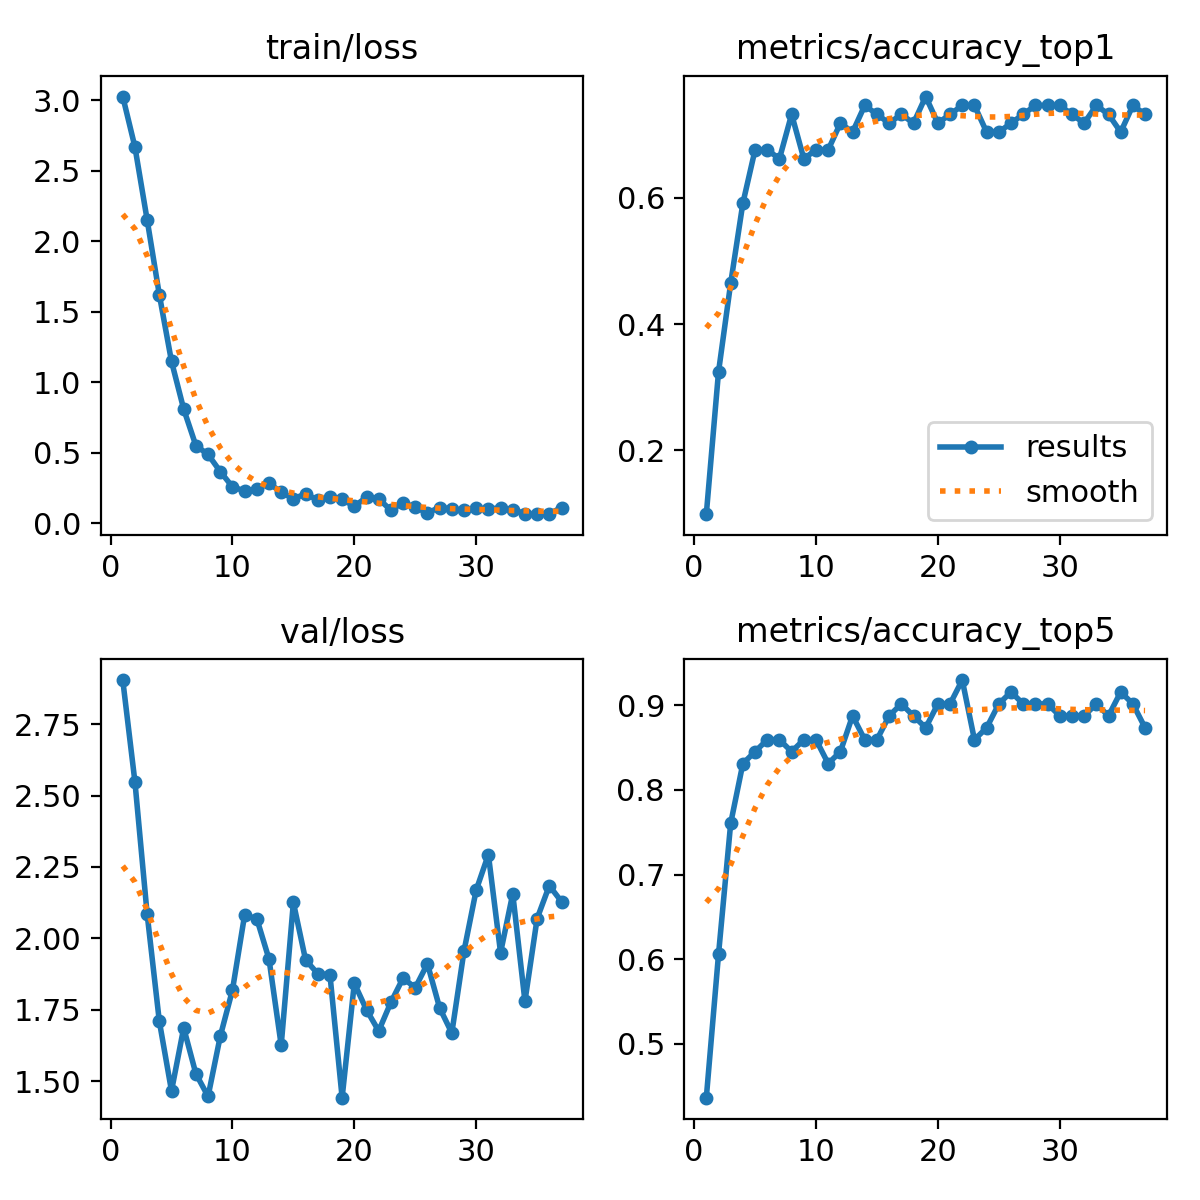

,epoch,time,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
27,28,115.077,0.10170,0.74648,0.90141,1.66837,0.000290,0.000290,0.000290
28,29,119.108,0.09176,0.74648,0.90141,1.95533,0.000284,0.000284,0.000284
29,30,123.132,0.10489,0.74648,0.88732,2.16886,0.000279,0.000279,0.000279
30,31,127.169,0.10128,0.73239,0.88732,2.29328,0.000274,0.000274,0.000274
31,32,131.340,0.10890,0.71831,0.88732,1.94955,0.000268,0.000268,0.000268
32,33,135.582,0.09695,0.74648,0.90141,2.15608,0.000263,0.000263,0.000263
33,34,139.724,0.06762,0.73239,0.88732,1.77966,0.000257,0.000257,0.000257
34,35,143.761,0.06448,0.70423,0.91549,2.06923,0.000252,0.000252,0.000252
35,36,147.819,0.06672,0.74648,0.90141,2.18426,0.000247,0.000247,0.000247
36,37,151.891,0.11134,0.73239,0.87324,2.12859,0.000241,0.000241,0.000241


In [ ]:
import os
from IPython.display import Image, display
import pandas as pd

run_dir = results.save_dir
display(Image(filename=os.path.join(run_dir, "results.png")))

df = pd.read_csv(os.path.join(run_dir, "results.csv"))
df.tail(10)
